## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [2]:
# 데이터 분석 필수 라이브러리 세트 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
transcript = pd.read_csv('/Users/jjeori/Desktop/transcript.csv')
portfolio = pd.read_csv('/Users/jjeori/Desktop/portfolio.csv')
profile = pd.read_csv("/Users/jjeori/Desktop/profile.csv")

### 2. 데이터 전처리 및 불필요한 칼럼 제거

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [4]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


##### 결측값이 있지만, 막연하게 dropna를 통해서 제거하기 보다는 활용할 수 있는 became_member_on 값은 정상적으로 되어 있는 것을 확인 할 수 있다.
> 원하는 칼럼만 따로 뽑고, 나머지 전처리를 하자.

In [5]:
# 해당 칼럼을 보기 쉽게 변경하기
profile.columns = ['제거', '성별', '나이', '제거2', '가입일','수입']

In [6]:
# 불필요한 칼럼 제거 및 결측값 제거
profile = profile.drop(['제거', '제거2'], axis = 1)
profile = profile.dropna()

In [7]:
profile

,성별,나이,가입일,수입
1,F,55,20170715,112000.0
3,F,75,20170509,100000.0
5,M,68,20180426,70000.0
8,M,65,20180209,53000.0
12,M,58,20171111,51000.0
...,...,...,...,...
16995,F,45,20180604,54000.0
16996,M,61,20180713,72000.0
16997,M,49,20170126,73000.0
16998,F,83,20160307,50000.0


In [8]:
portfolio =portfolio.drop(['Unnamed: 0', 'id'], axis = 1)

In [9]:
portfolio.columns = ['보상', '채널', '어려움', '지속', '제안유형']

In [10]:
portfolio.isnull().sum()

보상      0
채널      0
어려움     0
지속      0
제안유형    0
dtype: int64

In [11]:
transcript.drop(['Unnamed: 0', 'person', 'value'], axis = 1)

,event,time
0,offer received,0
1,offer received,0
2,offer received,0
3,offer received,0
4,offer received,0
...,...,...
306529,transaction,714
306530,transaction,714
306531,transaction,714
306532,transaction,714


In [12]:
portfolio

,보상,채널,어려움,지속,제안유형
0,10,"['email', 'mobile', 'social']",10,7,bogo
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
2,0,"['web', 'email', 'mobile']",0,4,informational
3,5,"['web', 'email', 'mobile']",5,7,bogo
4,5,"['web', 'email']",20,10,discount
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
7,0,"['email', 'mobile', 'social']",0,3,informational
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo
9,2,"['web', 'email', 'mobile']",10,7,discount


In [13]:
# 불필요한 변수 제거해주기
transcript = transcript.drop(['Unnamed: 0', 'person', 'value'], axis = 1)

In [14]:
# 결측치 여부 판단
transcript.isnull().sum()

event    0
time     0
dtype: int64

### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

- **정제된 데이터를 통해 각 칼럼 세분화하기**
1) 성별 분리
2) 연령대별로 분리
3) 가입일을 년도, 월별로 분리
4) 소득(?)

In [15]:
# 성별 분리하기 1
profile_m = profile[profile['성별'] == 'M']
profile_f = profile[profile['성별'] == 'F']

In [16]:
# 성별 분리하기 2
profile_m = profile_m.reset_index(drop = True)
profile_f = profile_f.reset_index(drop = True)

In [17]:
# 남성과 여성의 각 나이 Series 도출하기
profile_age_m = profile_m['나이']
profile_age_f = profile_f['나이']

In [18]:
# 연령대별로 분리하기
# Serise라면 for을 통해서 값을 list에 추가할 수 있다.
# 목적은 각 연령대별로 어느 연령대가 많이 참여했는지 확인하기 위함

def ages_suction(ages):
    age_10 = []
    age_20 = []
    age_30 = []
    age_40 = []
    age_50 = []
    age_60 = []
    age_70 = []
    age_80 = []
    age_90 = []
    age_100 = []

    for age in ages:
        if str(age)[0] == '1' and len(str(age)) == 2:
            age_10.append(age)
            
        elif str(age)[0] == '2':
            age_20.append(age)
            
        elif str(age)[0] == '3':
            age_30.append(age)
        
        elif str(age)[0] == '4':
            age_40.append(age)
        
        elif str(age)[0] == '5':
            age_50.append(age)
            
        elif str(age)[0] == '6':
            age_60.append(age)
            
        elif str(age)[0] == '7':
            age_70.append(age)
            
        elif str(age)[0] == '8':
            age_80.append(age)
            
        elif str(age)[0] == '9':
            age_90.append(age)
            
        elif len(str(age)) == 3:
            age_100.append(age)
            
    profile_ages = {'10대' : len(age_10), '20대' : len(age_20), '30대' : len(age_30), '40대' : len(age_40), '50대' : len(age_50), '60대' : len(age_60), '70대' : len(age_70), '80대' : len(age_80), '90대' : len(age_90), '100대' : len((age_100))}       

    return profile_ages

In [19]:
profile_ages_m = ages_suction(profile_age_m)
profile_ages_m

{'10대': 160,
 '20대': 960,
 '30대': 1008,
 '40대': 1434,
 '50대': 1925,
 '60대': 1602,
 '70대': 925,
 '80대': 371,
 '90대': 97,
 '100대': 2}

### Series 생성 및 활용법
- list를 series로 생성하기 : pd.Series(list, index = [리스트 길이에 맞게 해당 이름 설정])

- dit을 series로 생성하기 : pd.Series(dit, index의 경우 키 값에 미리 설정을 해뒀다면, 따로 하지 않아도 된다.)

- Series.values를 하면 series의 변수들을 알 수 있다.

- Series.index를 하면 series의 인덱스 값을 알 수 있다.



In [20]:
profile_ages_M = pd.Series(profile_ages_m)
profile_ages_M

10대      160
20대      960
30대     1008
40대     1434
50대     1925
60대     1602
70대      925
80대      371
90대       97
100대       2
dtype: int64

In [21]:
profile_ages_f = ages_suction(profile_age_f)
profile_ages_F = pd.Series(profile_ages_f)

* 수입을 통해서 알 수 있는 것은 무엇일까?

* 또한 하나의 칼럼은 쉽게 다룰 수 있지만, 두 개 이상의 칼럼 관계를 파악하는 것이 부족하다.

* 분석에서 가장 중요한 것은 변수들의 조합이나, 예상 밖의 변수에서 인사이트를 발견하는 것이 중요하다.

* 변수 조합에 대해서는 **merge**에 대해서 한 번 알아보기

In [22]:
profile = profile.reset_index(drop = True)

In [23]:
# 년도 및 월별로 나눠보기
# 여기서도 나눌 수 있는 기준이 다양하게 있음
# pd.to_datetime()을 통해서 타입을 date로 바꾸고, 년월일 사이에 '-'을 넣어줄 수 있음

from datetime import date

profile['가입일'] = pd.to_datetime(profile['가입일'], format = '%Y%m%d')


In [24]:
profile

,성별,나이,가입일,수입
0,F,55,2017-07-15,112000.0
1,F,75,2017-05-09,100000.0
2,M,68,2018-04-26,70000.0
3,M,65,2018-02-09,53000.0
4,M,58,2017-11-11,51000.0
...,...,...,...,...
14820,F,45,2018-06-04,54000.0
14821,M,61,2018-07-13,72000.0
14822,M,49,2017-01-26,73000.0
14823,F,83,2016-03-07,50000.0


In [25]:
def get_become_years(date):
    return datetime(date.year, 1, 1)

# apply 함수에 대한 이해가 필요하다.
# apply 속에 들어 있는 함수 값을 apply 앞에 붙어있는 해당 값에 적용시키는 것
profile['가입년도'] = profile['가입일'].apply(get_become_years)

In [26]:
def get_become_months(date):
    return datetime(1, date.month, 1)

profile['가입월'] = profile['가입일'].apply(get_become_months)

In [27]:
def get_become_year(date):
    return str(date.year) + '년'

profile['가입년도'] = profile['가입년도'].apply(get_become_year)

In [28]:
def get_become_month(date):
    return str(date.month) + '월'

profile['가입월'] = profile['가입월'].apply(get_become_month)

In [29]:
profile = profile.drop('가입일', axis = 1)

In [30]:
profile

,성별,나이,수입,가입년도,가입월
0,F,55,112000.0,2017년,7월
1,F,75,100000.0,2017년,5월
2,M,68,70000.0,2018년,4월
3,M,65,53000.0,2018년,2월
4,M,58,51000.0,2017년,11월
...,...,...,...,...,...
14820,F,45,54000.0,2018년,6월
14821,M,61,72000.0,2018년,7월
14822,M,49,73000.0,2017년,1월
14823,F,83,50000.0,2016년,3월


In [31]:
# 전체 성별을 기준으로 가입년도와 가입월을 count
profile_years = profile.groupby('가입년도').count()['성별']
profile_months = profile.groupby('가입월').count()['성별']

In [32]:
# offer received - 제안 받았다.
# offer viewed - 조회된 제안
# transaction - 거래
# offer completed - 제안 완료

transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   event   306534 non-null  object
 1   time    306534 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ MB


In [33]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [34]:
# bogo - by one get one 하나를 사면 하나를 더 준다는 의미로 사용 Ex) 스타벅스 bogo 쿠폰
# informational - 정보제공
# discount - 할인

portfolio['제안유형'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [35]:
# 데이터가 작기 때문에 육안으로 쉽게 판단을 내릴 수 있다.
# 시각화를 하거나 이럴 필요는 없을 것 같다.
# 채널을 기준으로 각 변수들의 대입해보기
# 제안유형에 따른 어려움, 지속, 보상에 대해서 보기
# 더 생각나면 추가해서 해석해보기

portfolio

,보상,채널,어려움,지속,제안유형
0,10,"['email', 'mobile', 'social']",10,7,bogo
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
2,0,"['web', 'email', 'mobile']",0,4,informational
3,5,"['web', 'email', 'mobile']",5,7,bogo
4,5,"['web', 'email']",20,10,discount
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
7,0,"['email', 'mobile', 'social']",0,3,informational
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo
9,2,"['web', 'email', 'mobile']",10,7,discount


In [36]:
# 연령대별로 분리하기
# Serise라면 for을 통해서 값을 list에 추가할 수 있다.
# 목적은 각 연령대별로 어느 연령대가 많이 참여했는지 확인하기 위함

def age_suction(ages):
    ages_list = []
    
    for age in ages:
        if str(age)[0] == '1' and len(str(age)) == 2:
            ages_list.append('10대')
            
        elif str(age)[0] == '2':
            ages_list.append('20대')
            
        elif str(age)[0] == '3':
            ages_list.append('30대')
        
        elif str(age)[0] == '4':
            ages_list.append('40대')
        
        elif str(age)[0] == '5':
            ages_list.append('50대')
            
        elif str(age)[0] == '6':
            ages_list.append('60대')
            
        elif str(age)[0] == '7':
            ages_list.append('70대')
            
        elif str(age)[0] == '8':
            ages_list.append('80대')
            
        elif str(age)[0] == '9':
            ages_list.append('90대')
            
        elif len(str(age)) == 3:
            ages_list.append('100대')
    
    return ages_list

In [37]:
# profile 데이터프레임에 연령대라는 새로운 칼럼을 추가한다.
profile['연령대'] = age_suction(profile['나이'])

##### 10대 20대 30대 ~ 100대로 변형시키는 함수를 생성하고 전체 값을 apply값을 적용시켜 해당 칼럼 전체 값을 바꾼다면
> 공통된 값이 생기는 것이니깐 이것을 통해서 수익의 평균을 낼 수 있지 않을까?


In [38]:
profile_age_income= round(profile.groupby('연령대').mean()['수입'], 0)

In [39]:
# 한글 폰트 사용하기

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

<AxesSubplot:ylabel='성별'>

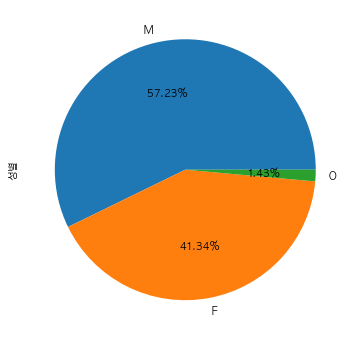

In [40]:
profile_genders = profile['성별'].value_counts()
profile_genders.plot.pie(figsize = (8, 6), autopct = '%.2f%%')

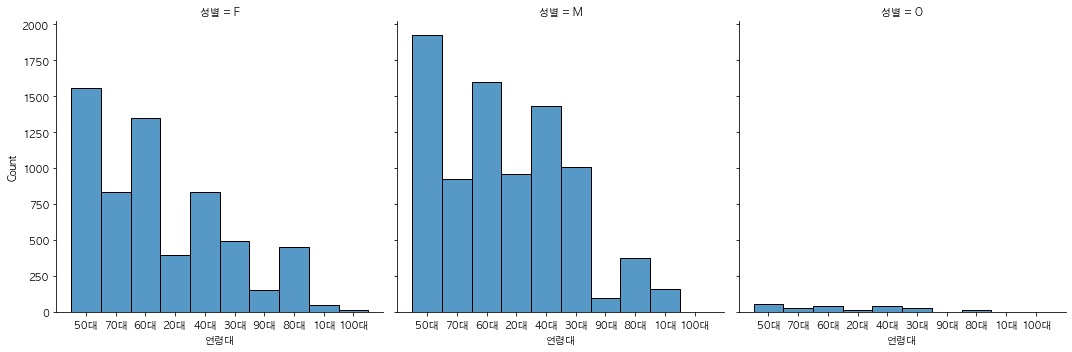

In [41]:
sns.displot(data = profile, x = profile['연령대'], col = '성별')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '10대'),
  Text(1, 0, '20대'),
  Text(2, 0, '30대'),
  Text(3, 0, '40대'),
  Text(4, 0, '50대'),
  Text(5, 0, '60대'),
  Text(6, 0, '70대'),
  Text(7, 0, '80대'),
  Text(8, 0, '90대'),
  Text(9, 0, '100대')])

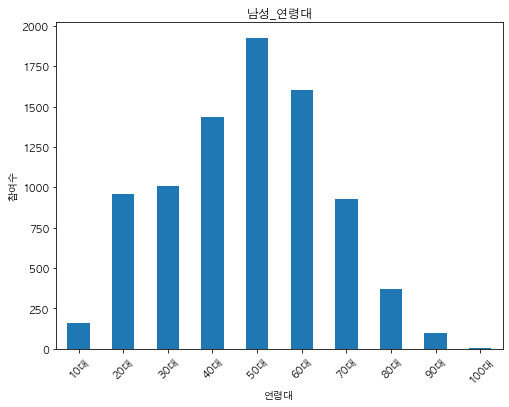

In [42]:
profile_ages_M.plot.bar(figsize = (8,6))
plt.title('남성_연령대')
plt.xlabel('연령대')
plt.ylabel('참여수')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '10대'),
  Text(1, 0, '20대'),
  Text(2, 0, '30대'),
  Text(3, 0, '40대'),
  Text(4, 0, '50대'),
  Text(5, 0, '60대'),
  Text(6, 0, '70대'),
  Text(7, 0, '80대'),
  Text(8, 0, '90대'),
  Text(9, 0, '100대')])

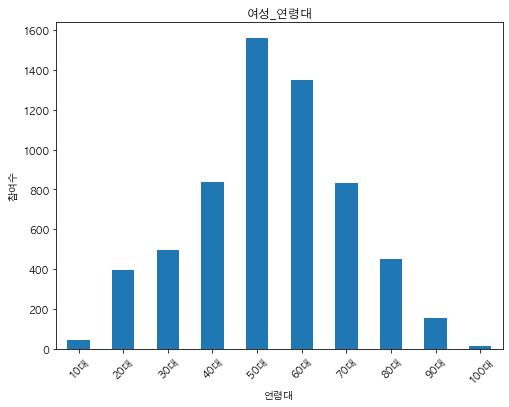

In [43]:
profile_ages_F.plot.bar(figsize = (8, 6))
plt.title('여성_연령대')
plt.xlabel('연령대')
plt.ylabel('참여수')
plt.xticks(rotation = 45)


Text(0, 0.5, '가입수')

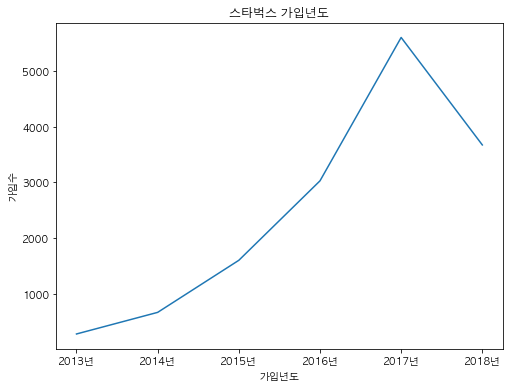

In [44]:
profile_years.plot.line(figsize = (8, 6))
plt.title('스타벅스 가입년도')
plt.ylabel('가입수')


In [45]:
profile_age_income = profile.groupby('연령대').mean()['수입']

Text(0, 0.5, '수입')

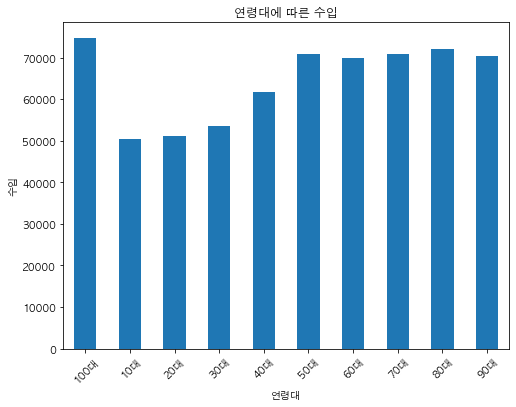

In [46]:
profile_age_income.plot.bar(figsize = (8, 6))
plt.title('연령대에 따른 수입')
plt.xticks(rotation = 45)
plt.ylabel('수입')

### *profile 시각화로 인해서 생각해볼 수 있는 경우는?*
> 수입과 참여수는 상관관계가 있을까?

> 연령대 별 참여수의 차이는 어디서 발생하는 것일까?

> 2016년에서 2017년에 가입자 수가 증가하는데, 이런 이유는 무엇일까?

> 반면, 2017년에서 2018년에는 가입자 수가 하락하는데, 이런 이유는 무엇일까?

>

<AxesSubplot:ylabel='event'>

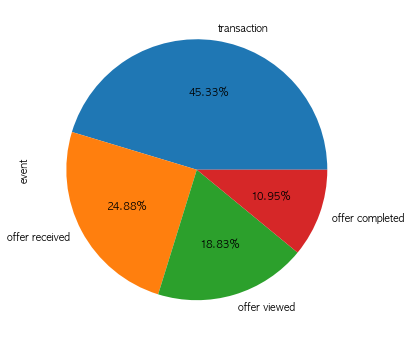

In [47]:
transcript['event'].value_counts().plot.pie(figsize = (8,6), autopct = '%.2f%%')

In [48]:
portfolio

,보상,채널,어려움,지속,제안유형
0,10,"['email', 'mobile', 'social']",10,7,bogo
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
2,0,"['web', 'email', 'mobile']",0,4,informational
3,5,"['web', 'email', 'mobile']",5,7,bogo
4,5,"['web', 'email']",20,10,discount
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount
7,0,"['email', 'mobile', 'social']",0,3,informational
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo
9,2,"['web', 'email', 'mobile']",10,7,discount


In [49]:
portfolio.groupby('제안유형').mean()

,보상,어려움,지속
제안유형,,,
bogo,7.5,7.50,6.0
discount,3.0,11.75,8.5
informational,0.0,0.00,3.5


### 함수 만들어서 각 년도별로 가입자 수 판단하기

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

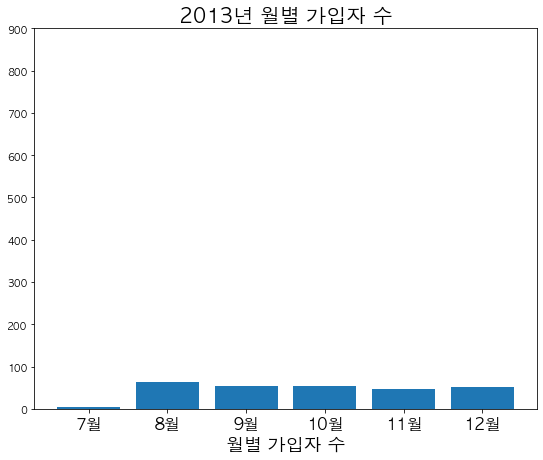

In [284]:
profile_2013 = profile[profile['가입년도'] == '2013년']['가입월'].value_counts()
profile_2013 = profile_2013.loc[['7월', '8월', '9월', '10월', '11월', '12월']]

plt.figure(figsize = (9, 7))
plt.bar(profile_2013.index, profile_2013.values)
plt.ylim([0, 900])
plt.title("2013년 월별 가입자 수", fontsize = 20)
plt.xlabel("월별 가입자 수", fontsize = 18)
plt.xticks(fontsize = 16)

### loc 특성
* 데이터 프레임에서 loc를 활용하는 방법은 다양하다.
1. loc[3]은 데이터 프레임에서 3번째 행의 값을 불러오는 것이고, loc[3, 컬럼명]을 했다면, 3번째 행에 해당하는 컬럼 값만 도출하는 것이다.
2. loc[:4, :칼럼명]을 해석하면, 0 ~ 4번째 행 + 첫 번째 칼럼에서 입력한 칼럼명까지 도출하는 것
3. loc 값으로 필터링도 가능하다. 예를 들어 df.loc[df['칼럼'] == 3] / df.loc[df['칼럼'] == 3] | df.loc[df['칼럼'] == 5], 기존 필터링 방법과 유사하다.

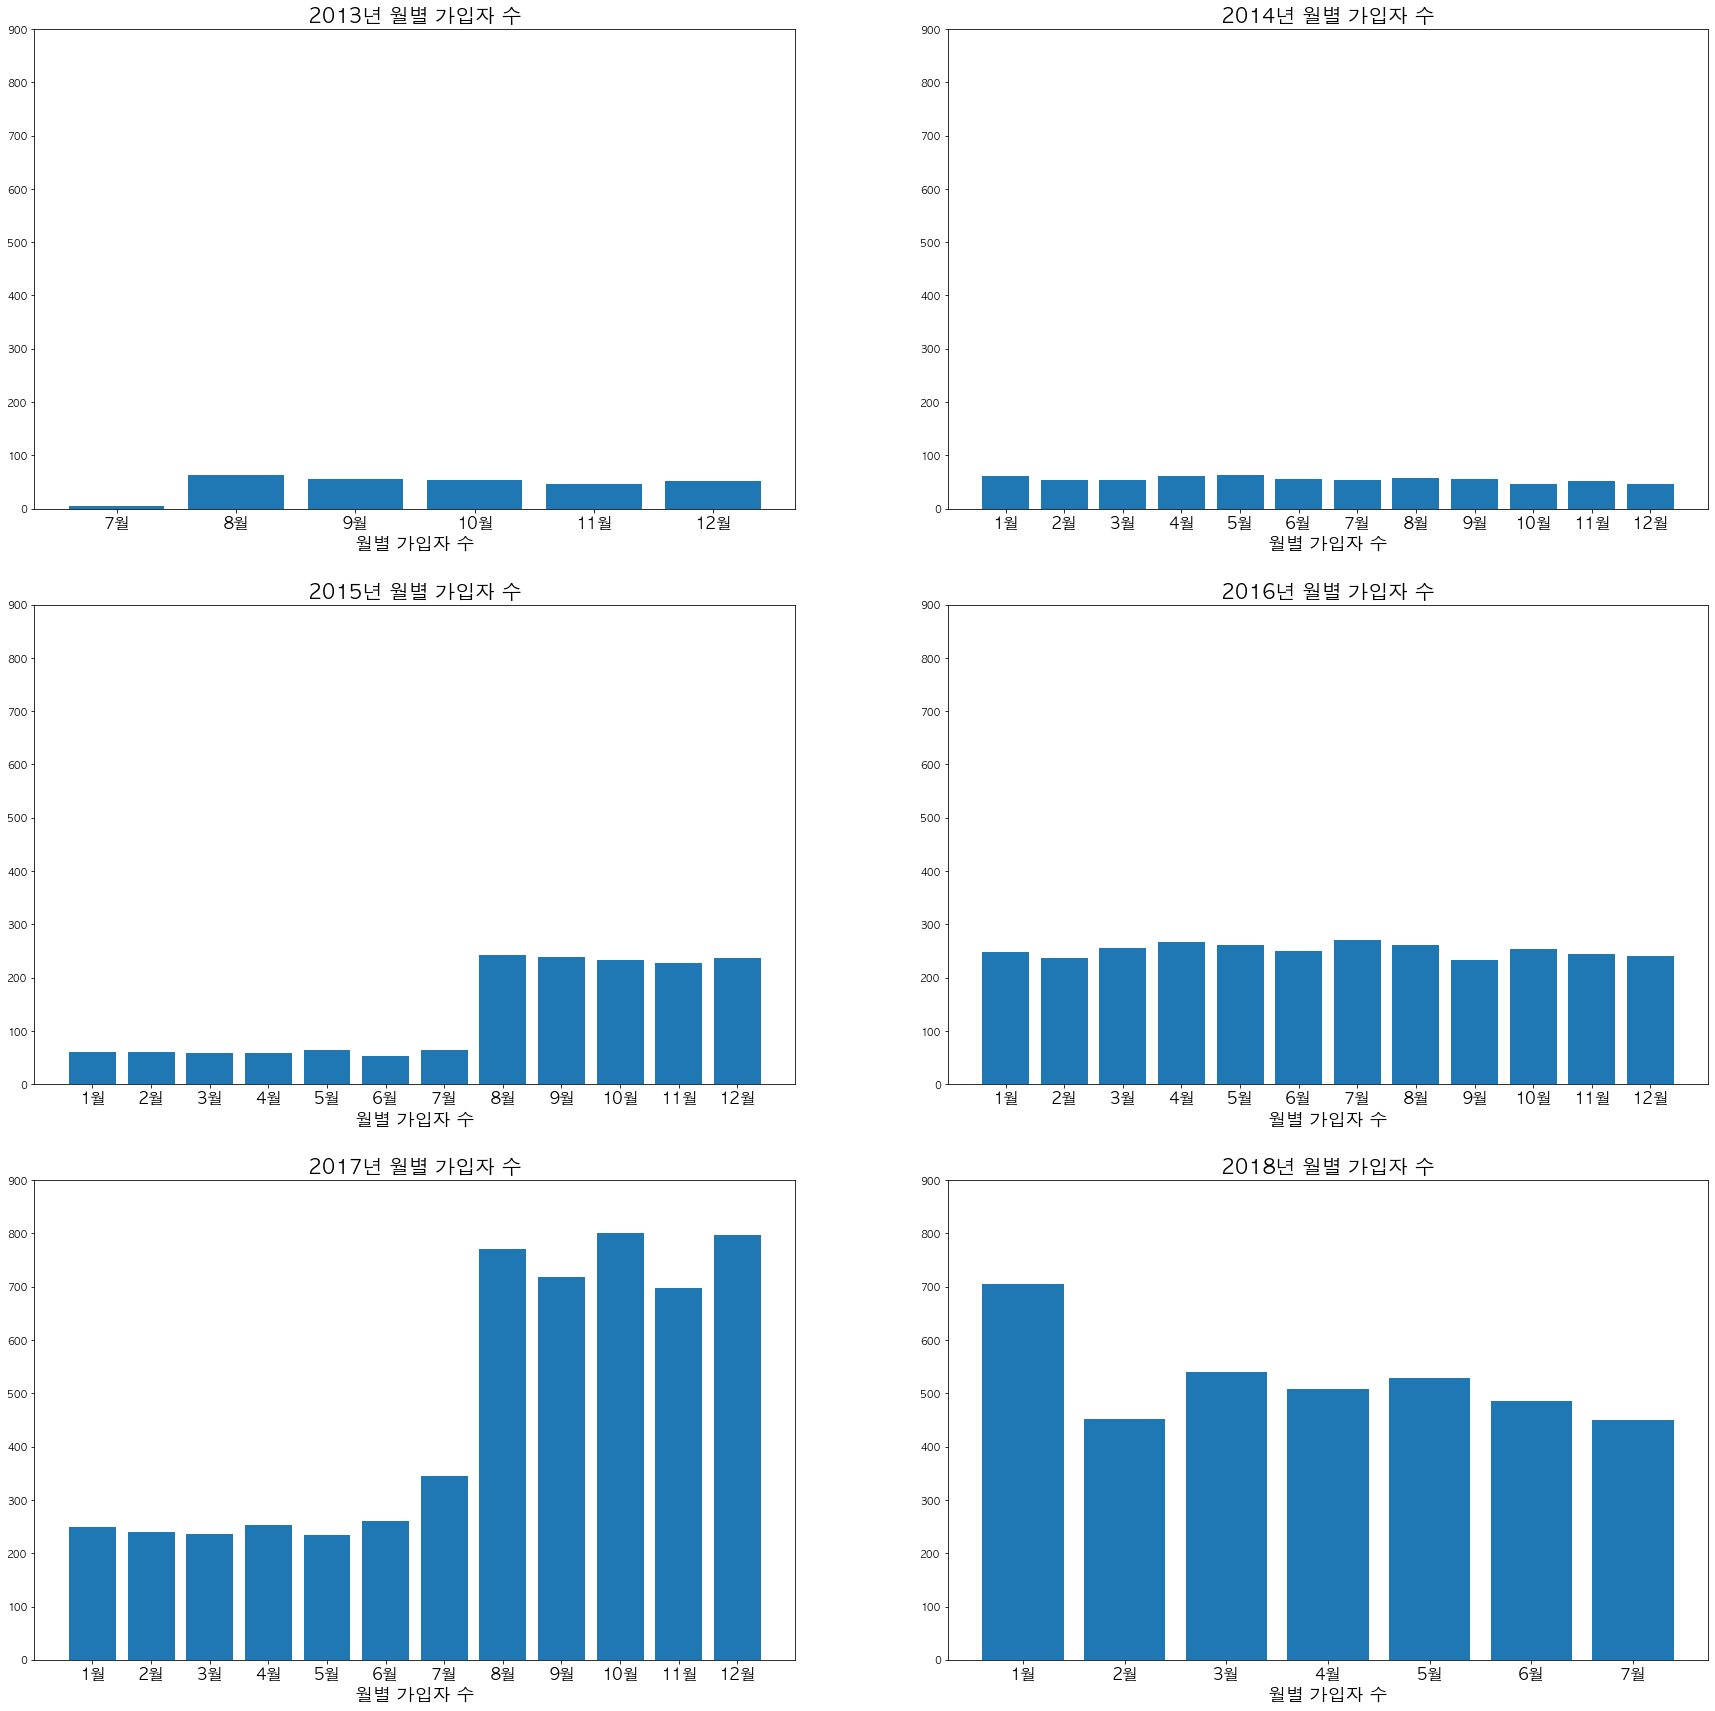

In [323]:
# x축 항목 순서 변경하기
# 참고: https://rfriend.tistory.com/724
# loc의 특성도 파악해야 할 듯
# 앞으로 블로그 글 쓸 때 내 글의 주제를 찾는 사람들이 쉽게 접근 할 수 있도록 제목에 대해서도 고민을 하고 작성해야 함.

# 원래는 2013년과 2018년 월별의 인덱스 길이가 같지 않아서 따로따로 했지만,
# lambda 함수를 활용해서 전부 표현했다. array나, index 값이라도 tolist()를 통해서 타입을 리스트로 변형하고, sort()를 활용해서 해당 값에 맞춰서 표현하니깐 인덱스 길이를 고려할 필요가 없어졌다.

profile_years = ['2013년','2014년', '2015년', '2016년', '2017년', '2018년']
plt.figure(figsize = (30, 30))


for uni_idx in range(len(profile_years)):
        plt.subplot(3, 2, uni_idx + 1)
        profile_year = profile[profile['가입년도'] == profile_years[uni_idx]]['가입월'].value_counts()
        profile_list = profile_year.index.tolist()
        profile_list.sort(key = lambda str: int(str[:-1]))
        profile_year = profile_year.loc[profile_list]
        plt.bar(profile_year.index, profile_year.values)
        plt.ylim([0, 900])
        plt.title(profile_years[uni_idx] + " " + "월별 가입자 수", fontsize = 20)
        plt.xlabel("월별 가입자 수", fontsize = 18)
        plt.xticks(fontsize = 16)
    

In [312]:
# m_list = ['7월', '5월', '4월', '2월', '11월', '9월', '12월', '6월', '8월', '1월', '10월', '3월']
# m_list.sort(key = lambda str: int(str[:-1]))
# print(m_list)

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']


In [320]:
profile_2017 = profile[profile['가입년도'] == '2017년']['가입월'].value_counts()
type(profile_2017.index.tolist())

# list_2017 = profile_2017.unique().tolist()

# list_2017.sort(key = lambda str: int(str[:-1]))

# print(list_2017)

list